Cleaning and preparing the data for model training

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [118]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df_train= pd.read_csv('/Users/sripadma/Desktop/Data science/Data/Day 2 EDA/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df_test= pd.read_csv('/Users/sripadma/Desktop/Data science/Data/Day 2 EDA/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [51]:
#merge both train and test data
df=df_train.append(df_test)
df.head()

AttributeError: 'DataFrame' object has no attribute 'append'

In [52]:
import pandas as pd

# Assuming df_train and df_test are your dataframes
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
import pandas as pd

# Assuming df_train and df_test are your DataFrames
df = pd.concat([df_train, df_test], ignore_index=True)

# Displaying the first few rows of the merged DataFrame
print(df.head())


   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN   

In [11]:
# Basic COde
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [13]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [54]:
#delete unwanted column
df.drop(['User_ID'],axis=1, inplace=True)

In [55]:
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 65.8+ MB


# data preprocessing

Handling Caetrogorical data


In [56]:
pd.get_dummies(df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


In [59]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)
df['Gender']

0         False
1         False
2         False
3         False
4          True
          ...  
783662    False
783663    False
783664    False
783665    False
783666    False
Name: Gender, Length: 783667, dtype: bool

In [62]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,NaN,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,NaN,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,NaN,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,NaN,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,NaN,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
# Handle categorial feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [63]:
#pd.get_dummies(df['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
783662,False,True,False,False,False,False
783663,False,True,False,False,False,False
783664,False,True,False,False,False,False
783665,False,False,False,True,False,False


In [64]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df['Age']

0         1
1         1
2         1
3         1
4         7
         ..
783662    3
783663    3
783664    3
783665    5
783666    5
Name: Age, Length: 783667, dtype: int64

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,NaN,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,NaN,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,NaN,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,NaN,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,NaN,7,16,C,4+,0,8,NaN,NaN,7969.0


In [23]:
# greek website second techinqu
# Import label encoder   not a good idea now
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Age']= label_encoder.fit_transform(df['Age']) 

df['Age'].unique() 


array([0, 6, 2, 4, 5, 3, 1])

In [65]:
# fixing categorical city_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [67]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [68]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,NaN,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,NaN,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,NaN,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,NaN,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [69]:
#drop city categoty feature
df.drop('City_Category',axis=1)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,NaN,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,NaN,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,NaN,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,NaN,7,16,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,NaN,3,15,4+,1,8,NaN,NaN,NaN,True,False
783663,P00254642,NaN,3,15,4+,1,5,8.0,NaN,NaN,True,False
783664,P00031842,NaN,3,15,4+,1,1,5.0,12.0,NaN,True,False
783665,P00124742,NaN,5,1,4+,0,10,16.0,NaN,NaN,False,True


In [70]:
df.drop('City_Category',axis=1,inplace= True)

In [71]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,NaN,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,NaN,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,NaN,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,NaN,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [72]:
#missing values
df.isnull().sum()

Product_ID                         0
Gender                        783667
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [74]:
# focus on replacing missing values------discrete features
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [75]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [81]:
#best way to repalce the missing value 

df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [87]:
#best way to repalce the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [88]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [95]:
#best way to repalce the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2']

0         8.0
1         8.0
2         8.0
3         8.0
4         8.0
         ... 
783662    8.0
783663    8.0
783664    8.0
783665    8.0
783666    8.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [93]:
df['Product_Category_2'].mode()[0]

8.0

In [85]:
df['Product_Category_2'].isnull().sum()

783666

In [96]:
##product category 3 missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [98]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [99]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [100]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,NaN,1,10,2,0,1,8.0,14.0,15200.0,False,False
2,P00087842,NaN,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,NaN,1,10,2,0,12,8.0,16.0,1057.0,False,False
4,P00285442,NaN,7,16,4+,0,8,8.0,16.0,7969.0,False,True


In [101]:
df['Product_Category_3'].isnull().sum()

0

In [103]:
df.shape

(783667, 12)

In [104]:
# missing values-2
df['Product_Category_2'].unique()

array([8.])

In [105]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0    783667
Name: count, dtype: int64

In [106]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [107]:
df['Product_Category_2'].isnull().sum()

0

In [108]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,NaN,1,10,2,0,1,8.0,14.0,15200.0,False,False
2,P00087842,NaN,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,NaN,1,10,2,0,12,8.0,16.0,1057.0,False,False
4,P00285442,NaN,7,16,4+,0,8,8.0,16.0,7969.0,False,True


In [109]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [111]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [112]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,NaN,1,10,2,0,1,8.0,14.0,15200.0,False,False
2,P00087842,NaN,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,NaN,1,10,2,0,12,8.0,16.0,1057.0,False,False
4,P00285442,NaN,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(4), int64(4), object(2)
memory usage: 61.3+ MB


In [114]:
# convert object into interger for 'Stay_In_Current_City_Years'
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(4), int64(5), object(1)
memory usage: 61.3+ MB


In [115]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 71.7+ MB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

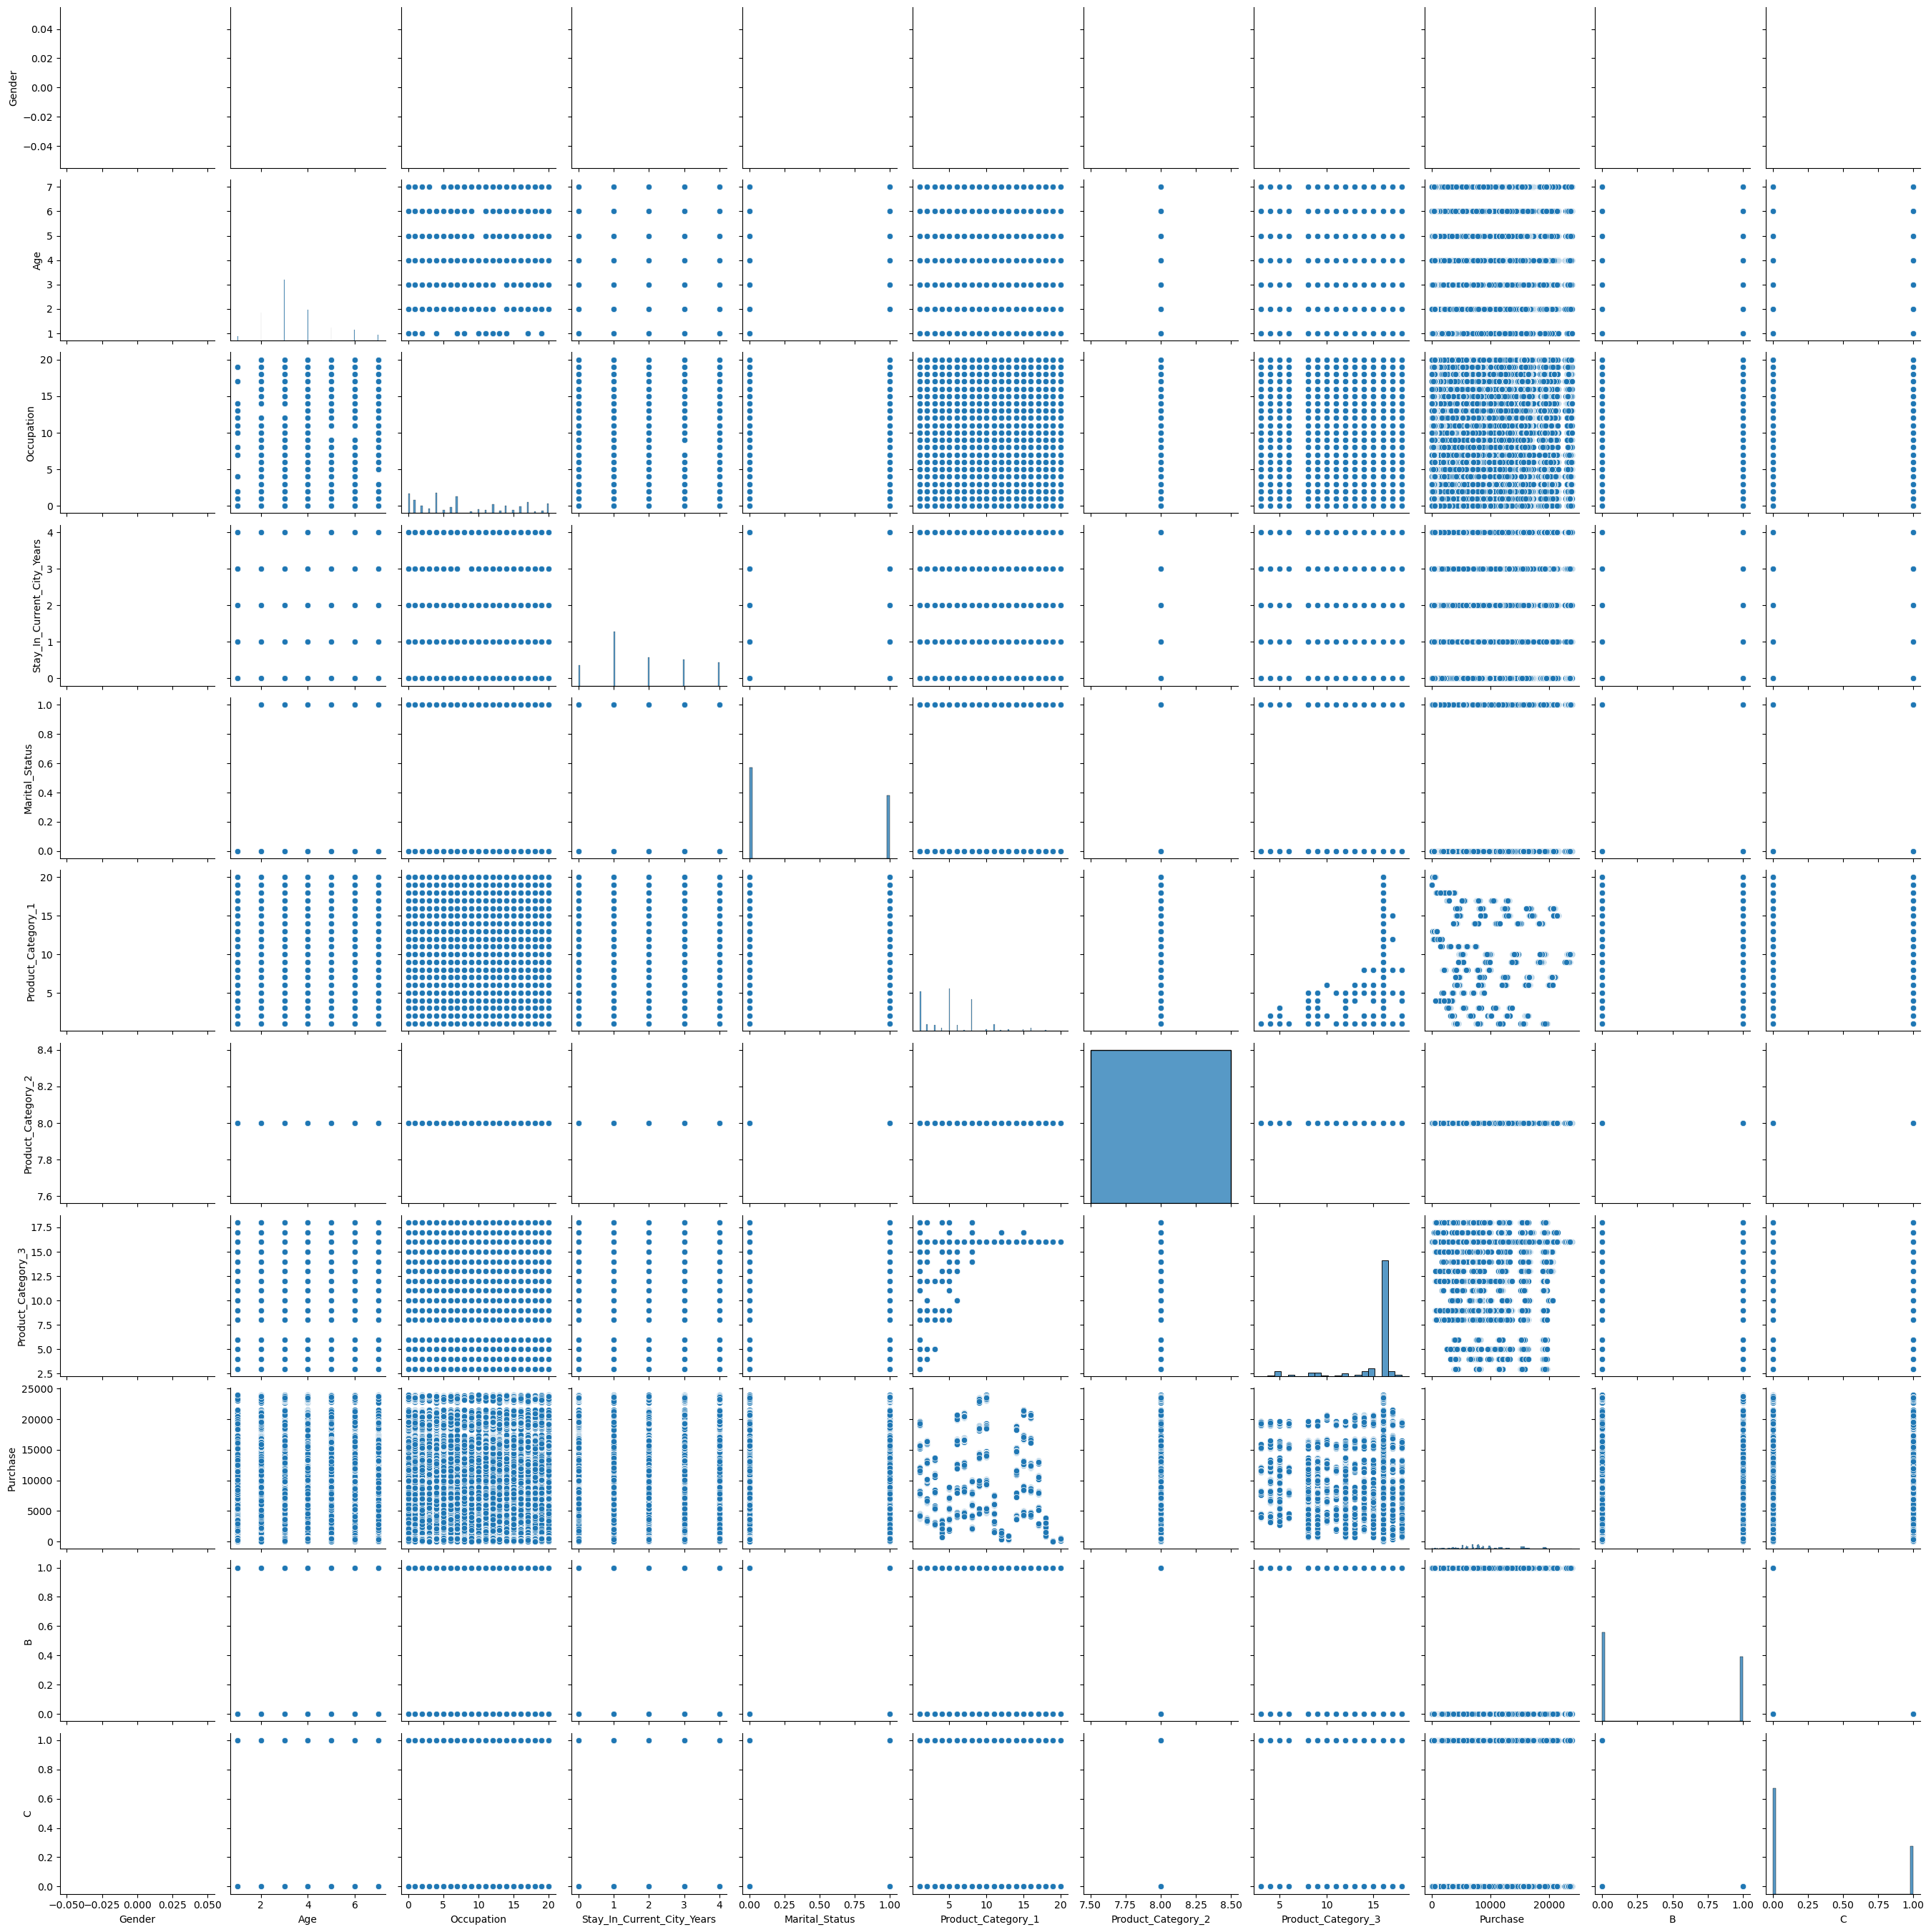

In [119]:
#visualization
sns.pairplot(df)

In [123]:
sns.barplot('Age','Purchase',hue = 'Gender',data = df)

TypeError: barplot() got multiple values for argument 'data'

In [127]:
import seaborn as sns

sns.barplot('Age','Purchase', hue='Gender', data=df)


TypeError: barplot() got multiple values for argument 'data'

In [126]:
# visualization of purchase with occupation
sns.barplot('Occupation','Purchase', hue='Gender', data=df)

TypeError: barplot() got multiple values for argument 'data'

In [128]:
sns.barplot('Product_Category_1 ','Purchase', hue='Gender', data=df)

TypeError: barplot() got multiple values for argument 'data'

In [129]:
df.head()


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,NaN,1,10,2,0,1,8.0,14.0,15200.0,0,0
2,P00087842,NaN,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,NaN,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,P00285442,NaN,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [130]:
sns.barplot('Product_Category_1 ','Purchase', hue='Gender', data=df)

TypeError: barplot() got multiple values for argument 'data'

In [131]:

sns.barplot('Product_Category_2','Purchase', hue='Gender', data=df)


TypeError: barplot() got multiple values for argument 'data'

In [135]:
## Feature Scaling
df_test=df[df['Purchase'].isnull()]

In [136]:
df_train= df[~df['Purchase'].isnull()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,P00128942,NaN,5,7,2,1,1,8.0,16.0,NaN,1,0
550069,P00113442,NaN,3,17,0,0,3,8.0,16.0,NaN,0,1
550070,P00288442,NaN,4,1,4,1,5,8.0,16.0,NaN,1,0
550071,P00145342,NaN,4,1,4,1,4,8.0,16.0,NaN,1,0
550072,P00053842,NaN,3,1,1,0,4,8.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,NaN,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,P00254642,NaN,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,P00031842,NaN,3,15,4,1,1,8.0,12.0,NaN,1,0
783665,P00124742,NaN,5,1,4,0,10,8.0,16.0,NaN,0,1


In [153]:
X=df_train.drop('Purchase',axis=1)

In [165]:

X=df_train.drop('Product_ID',axis=1)


In [166]:
X.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [167]:
X.shape

(550068, 11)

In [168]:
y=df_train['Purchase']

In [169]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [170]:
y.shape

(550068,)

In [171]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [173]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: could not convert string to float: 'M'